 # Tensor

## pytorch基本数据类型
pytorch 面向计算的gpu加速库
没有内建string支持，必须采用编码形式

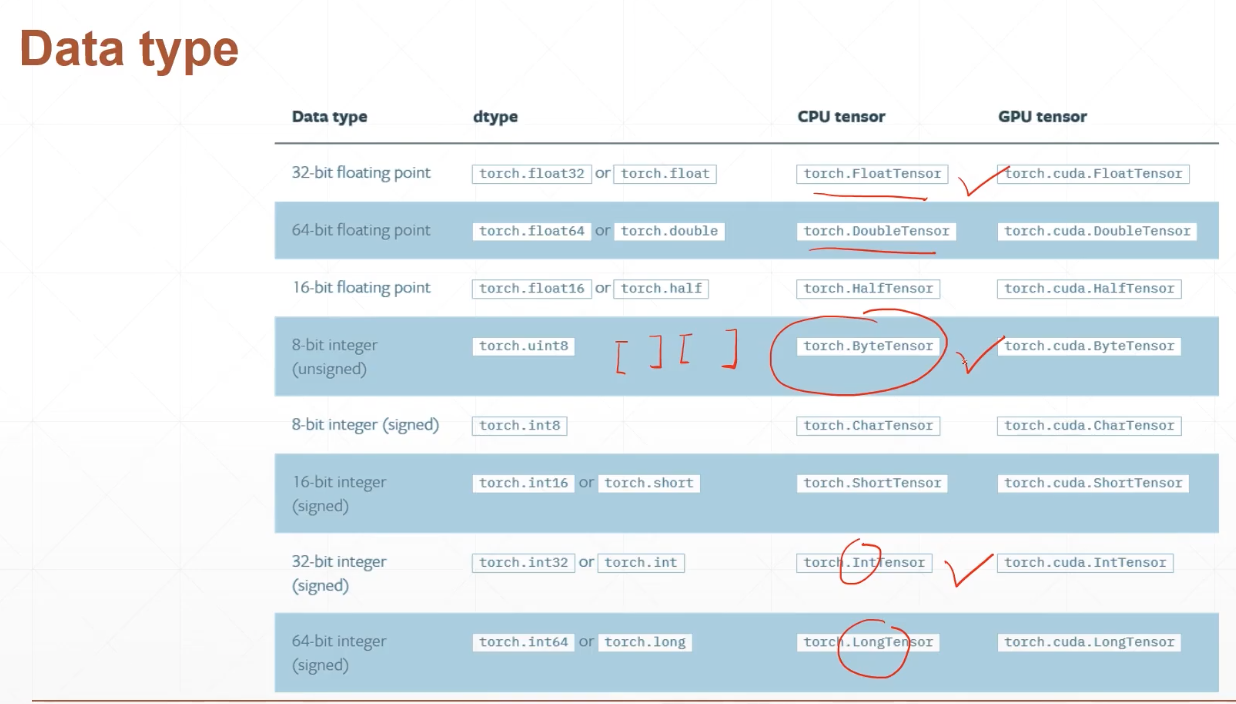

In [7]:
# type check
import torch
a = torch.randn(2, 3)
print(a.type(), type(a), isinstance(a, torch.FloatTensor))

torch.FloatTensor <class 'torch.Tensor'> True


In [12]:
# Dimension0/rank0 标量（loss值）
print(torch.tensor(1.3))
# check
b = torch.tensor(1.3)
print(b.shape , len(b.shape), b.size(), b.dim())

tensor(1.3000)
torch.Size([]) 0 torch.Size([]) 0


In [29]:
# Dim1/rank1 一维张量 (Bias偏置，Linear Input神经网络线性输入)
c = torch.tensor([1.1, 2.2]) # 带中括号后，会自动生成为张量，不带就标量
print(c)
d = torch.FloatTensor(2) # 生成dim为1，size为2的随机张量
print(d)
import numpy as np
e = np.ones(2)
print(e, type(e))
print(torch.from_numpy(e)) # 从numpy引入
# check
data = torch.ones(2)
data.shape

tensor([1.1000, 2.2000])
tensor([9.8091e-45, 0.0000e+00])
[1. 1.] <class 'numpy.ndarray'>
tensor([1., 1.], dtype=torch.float64)


torch.Size([2])

In [33]:
# Dim2 (Linear Input batch,多张图片的linear输入)
a = torch.randn(2,3) # 随机正态分布
print(a)
print(a.shape)
print(a.size(0), a.shape[0]) # 第一个维的元素个数
print(a.size(1), a.shape[1]) # 第二个维的元素个数

tensor([[-2.7812, -0.1255, -0.9773],
        [-0.7219, -0.0168, -1.2403]])
torch.Size([2, 3])
2 2
3 3


In [39]:
# Dim3 （RNN input Batch,一次送100个特征的10个单词的20句话）
a = torch.rand(1, 2, 3) # 随机均匀分布
print(a)
print(a[0]) # 第一个纬度的第0个元素
print(a.shape)
print(list(a.shape)) # 对torch类型转化为list方便和python交互

tensor([[[0.8280, 0.8165, 0.3459],
         [0.9306, 0.3660, 0.6720]]])
torch.Size([1, 2, 3])
tensor([[[0.8280, 0.8165, 0.3459],
         [0.9306, 0.3660, 0.6720]]])
[1, 2, 3]


In [40]:
# Dim4 (CNN，输入10张3通道的照片，张片长宽为28*28)
a = torch.rand(10, 3, 28, 28) # batch,channel, height, width
# 查看tensor所占内存大小
print(a.numel(), a.dim()) # 查看dimension看维度更加直观

23520 4


## 创建Tensor
1. 从numpy引入
2. 从list中引入
3. 创建未初始化数据
4. 设置默认tensor数据类型
5. 随机均匀分布初始化
6. 随机正态分布初始化
7. full赋值
8. arange等差数列
9. linspace/logspace等分数列
10. ones/zeros/eye
11. randperm随机打散

- import from numpy

In [43]:
a = np.array([2, 3])
torch.from_numpy(a)

tensor([2, 3])

- import from list
- 注意tensor接具体元素
- Tensor和FloatTensor后接shape,想接具体元素需用 [ ] 通过list介入

In [48]:
print( torch.tensor([2., 3.2]) )
print( torch.FloatTensor(2,3) )

# 一般不使用，可以用tensor代替防止混淆
print( torch.FloatTensor([[2., 3.2], [3., 3.2]]) ) 

tensor([2.0000, 3.2000])
tensor([[-1.0842e-19,  2.1500e+00,  0.0000e+00],
        [ 3.6734e-40,  1.0438e-36,  1.4013e-45]])
tensor([[2.0000, 3.2000],
        [3.0000, 3.2000]])


- uninitialized未初始化的数据

In [49]:
torch.empty(2, 3)
torch.FloatTensor(2, 3)
torch.IntTensor(2, 3)

tensor([[ 875901285,  761672248,  929457721],
        [ 909456429, 1650601266,  825046584]], dtype=torch.int32)

- set default type 设置默认tensor类型

In [65]:
print(torch.tensor([1., 3]).type())
torch.set_default_tensor_type(torch.DoubleTensor) 
torch.tensor([1., 3]).type() 

torch.FloatTensor


'torch.DoubleTensor'

- rand / rand_like , randint 随机均匀分布
- [0, 1]
- [min, max)
- *_like

In [66]:
a = torch.rand(3, 3)
torch.rand_like(a)
torch.randint(1, 10, [3, 3]) # min, max, shape

tensor([[7, 3, 2],
        [7, 3, 2],
        [4, 6, 1]])

- randn

In [72]:
torch.randn(3, 3) # shape是3,3 均值为0方差为1
# torch.normal 可以自定义均值和方差 

tensor([[-0.5023, -1.3298, -0.1476],
        [ 0.7010,  1.5734,  0.4773],
        [-0.1572, -0.0719,  0.4607]])

- full

In [75]:
print(torch.full([2, 3], 7)) # dim=2
print(torch.full([], 7)) # 标量

tensor([[7, 7, 7],
        [7, 7, 7]])
tensor(7)


- arange 

In [78]:
torch.arange(0, 10, 2) # min, max, 阶梯

tensor([0, 2, 4, 6, 8])

- linspace/logspace

In [82]:
torch.linspace(0, 10, steps=4) # min, max, 等分数量
torch.logspace(0, 1, steps=10) # 返回的是10的x次方，最后一个数是10的1次方

tensor([ 1.0000,  1.2915,  1.6681,  2.1544,  2.7826,  3.5938,  4.6416,  5.9948,
         7.7426, 10.0000])

- ones/zeros/eye(对角)

In [84]:
torch.ones(3, 3)
torch.eye(3, 4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])

- randperm随机打散

In [117]:
print(torch.randperm(10)) # 10代表打散种子，可以配对打散
a = torch.rand(2, 3)
b = torch.rand(2, 2)
print(a)
print(b)
idx = torch.randperm(2) # 将索引打乱
a = a[idx] # 根据打乱的索引重新排序
b = b[idx]
a, b

tensor([4, 9, 8, 6, 1, 2, 0, 5, 7, 3])
tensor([[0.1031, 0.3979, 0.0199],
        [0.5385, 0.2800, 0.3464]])
tensor([[0.7727, 0.3212],
        [0.0918, 0.2598]])


(tensor([[0.5385, 0.2800, 0.3464],
         [0.1031, 0.3979, 0.0199]]),
 tensor([[0.0918, 0.2598],
         [0.7727, 0.3212]]))